In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import missingno as msno
import seaborn as sns; sns.set(style='ticks', context='talk')
from sklearn import preprocessing
import cartopy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import glob
from geopandas import GeoDataFrame
from shapely.geometry import Point
import geopandas as gpd
import itertools
import hypertools as hyp
mapbox = cimgt.MapboxTiles('pk.eyJ1IjoiamVzc2VwaXNlbCIsImEiOiJjamdmaHlxajkybnhmMnFtcXppaW90bDVjIn0.i2qzLErAxTjsmwl127P-jQ', 'mapbox.high-contrast')

In [2]:
nure=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\nure.csv', encoding ='iso-8859-1')
le = preprocessing.LabelEncoder()
le.fit(nure.methods)
list(le.classes_)
cats = le.transform(nure.methods) 

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,20,28,29,31,35,46,47,48,66,68,79,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>


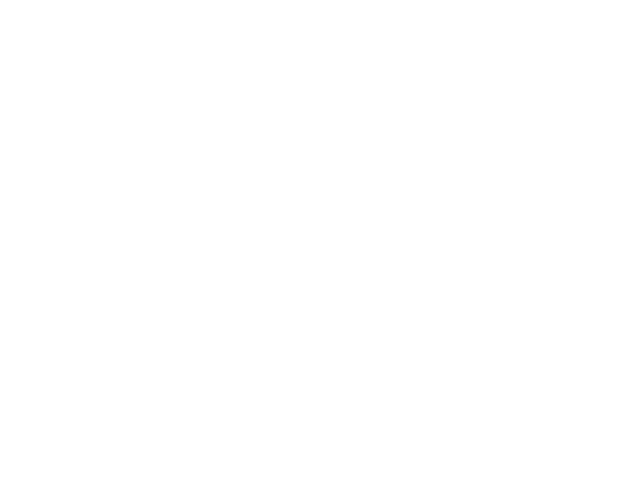

Traceback (most recent call last):
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colorbar.py", line 957, in on_mappable_changed
    self.update_normal(mappable)
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colorbar.py", line 987, in update_normal
    self.draw_all()
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colorbar.py", line 353, in draw_all
    self._config_axes(X, Y)
  File "C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colorbar.py", line 461, in _config_axes
    self.update_ticks()
  

In [10]:
ax = plt.axes(projection=mapbox.crs)
ax.add_image(mapbox, 8)

ax.set_extent([-111.5,-103.5,40.5,45.5])
#plt.scatter(nure.longitude, nure.latitude, c=cats, s=0.4, transform=ccrs.Geodetic(), alpha=0.3)
plt.scatter(nure.longitude, nure.latitude, c=cats, s=0.4, alpha=0.3, cmap=plt.cm.get_cmap('tab20', 17),transform=ccrs.Geodetic())
formatter = plt.FuncFormatter(lambda val, loc: nure.methods.unique()[val])
plt.colorbar(ticks=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], format=formatter);
plt.clim(-0.5, 17)
plt.savefig(r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\Report\\figure1a.png', dpi=600)


In [24]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
#writes the point data to a shapefile in the dir called data.shp
geometry = [Point(xy) for xy in zip(nure.longitude, nure.latitude)]
crs = {'init': 'epsg:3732'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(nure, crs={'init': 'epsg:4326'}, geometry=geometry)
projGeoDF=geo_df.to_crs(crs)
projGeoDF.to_file(driver='ESRI Shapefile', filename='nure_imputed.shp')

In [11]:
ref = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\tblRockGeoData.csv', index_col = [0])
path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\ngdbrock-fUS56\\ngdbrock-fUS56\\'
allFiles=glob.glob(path+"*.csv")
analysis = pd.DataFrame
moving = []
for file in allFiles:
    types = pd.read_csv(file)
    moving.append(types)
analysis = pd.concat(moving, sort=False)
    
    
merged = ref.merge(analysis, on='lab_id')
merged.drop(columns=['br_ppm', 'ir_ppm','rn_ppm', 'i_ppm', 'ir_ppb', 'au_ppb'], inplace=True)
merged['tracking'] = np.arange(0,len(merged))

le = preprocessing.LabelEncoder()
le.fit(merged.method)
list(le.classes_)
cats = le.transform(merged.method) 

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,14,26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
#writes the point data to a shapefile in the dir called data.shp
geometry = [Point(xy) for xy in zip(merged.longitude, merged.latitude)]
crs = {'init': 'epsg:3732'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(merged, crs={'init': 'epsg:4326'}, geometry=geometry)
projGeoDF=geo_df.to_crs(crs)
projGeoDF.to_file(driver='ESRI Shapefile', filename='rock_imputed.shp')

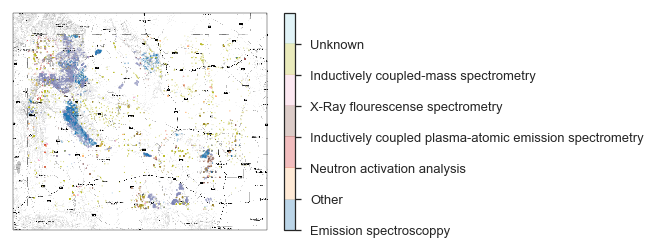

In [7]:
ax = plt.axes(projection=mapbox.crs)
ax.add_image(mapbox, 8)

ax.set_extent([-111.5,-103.5,40.5,45.5])
#plt.scatter(nure.longitude, nure.latitude, c=cats, s=0.4, transform=ccrs.Geodetic(), alpha=0.3)
plt.scatter(merged.longitude, merged.latitude, c=cats, s=0.4, alpha=0.3, cmap=plt.cm.get_cmap('tab20', 7),transform=ccrs.Geodetic())
formatter = plt.FuncFormatter(lambda val, loc: merged.method.unique()[val])
plt.colorbar(ticks=[0, 1, 2,3,4,5,6], format=formatter);
plt.clim(0, 7)
plt.savefig(r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\Report\\figure2a.png', dpi=600)

quads = gpd.read_file(r'J:\Geology\WSGS\GIS\quad250k.shp')
quads = quads.to_crs({'init': 'epsg:3732'})

In [5]:
geometry = [Point(xy) for xy in zip(merged.longitude, merged.latitude)]
crs = {'init': 'epsg:3732'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(merged, crs={'init': 'epsg:4326'}, geometry=geometry)
projGeoDF=geo_df.to_crs(crs)

In [6]:
combined = gpd.sjoin(projGeoDF, quads, op='intersects')

NameError: name 'quads' is not defined

In [145]:
combined['QUAD'].value_counts().sort_index()

Arminto          327
Ashton          2507
Casper          1559
Cheyenne         745
Cody            5335
Driggs          3122
Gillette         686
Lander          2013
Newcastle        672
Ogden             62
Preston          769
Rawlins         3760
Rock Springs     643
Sheridan         678
Thermopolis     5421
Torrington      1195
Name: QUAD, dtype: int64

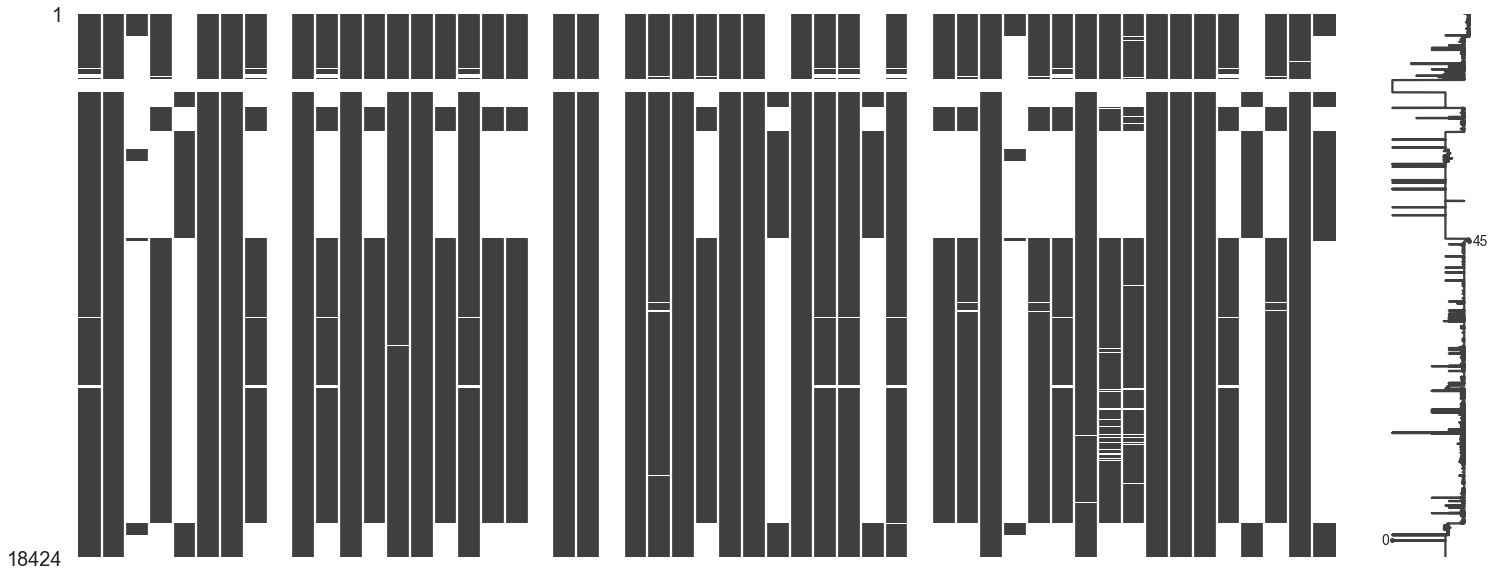

In [9]:
msno.matrix(nure.iloc[:18424,85:-8])

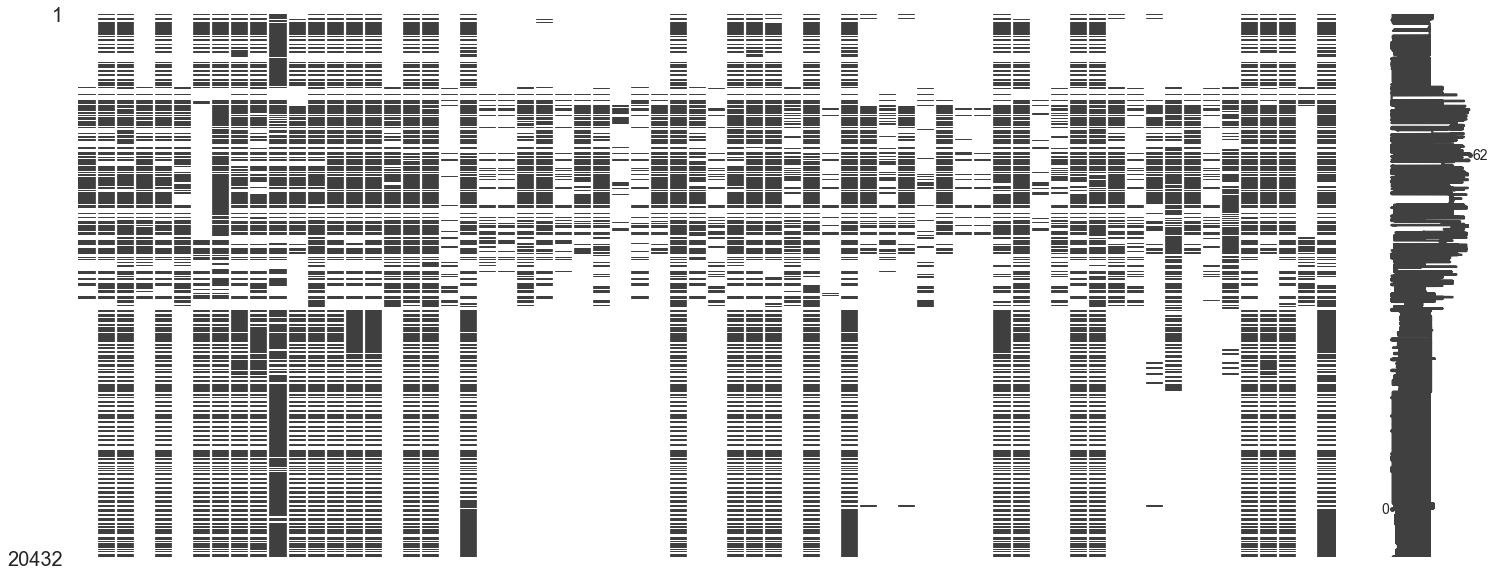

In [12]:
msno.matrix(merged.iloc[:20432,32:-4])

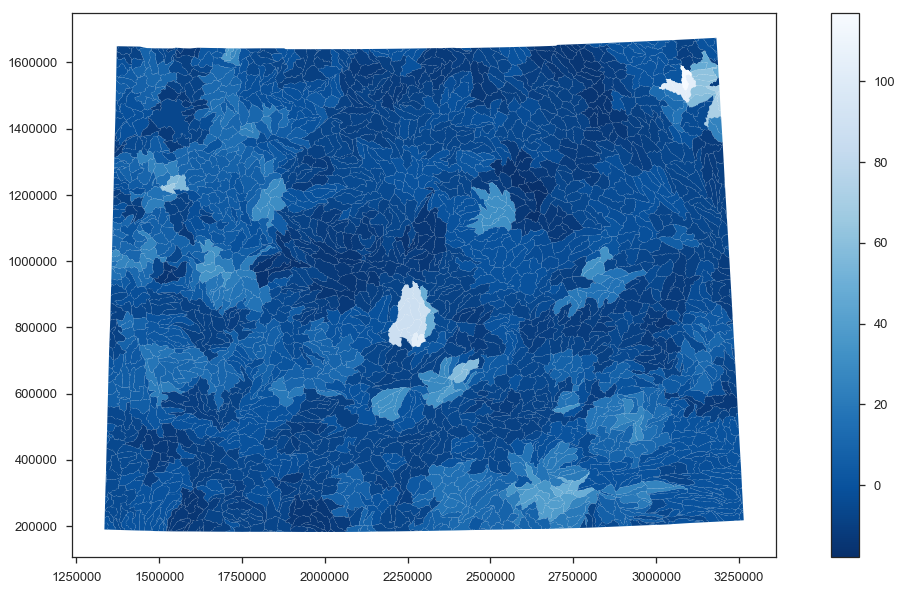

In [3]:
huc12 = gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12 = huc12.to_crs({'init': 'epsg:3732'})

path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\hotspot analysis\\rock hotspot joined with hucs\\REE\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed, sort=False)
frame = frame.drop(columns=['Join_Count', 'TARGET_FID', 'AREA', 'PERIMETER', 'WY_HU12_',
       'WY_HU12_ID', 'HUC_8', 'HUC_10', 'ACRES', 'STATES',
       'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE',
       'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD', 'HU_12_TYPE', 'HU_2_NAME',
       'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME', 'Shape_Leng', 'SOURCE_ID',
       'GiPValue', 'NNeighbors', 'Gi_Bin',
       ])
summary = frame.groupby('HUC_12', as_index=False).sum()
middle=huc12.merge(summary.astype(object), on='HUC_12', how='right')
combined = huc12.merge(middle[['HUC_12', 'GiZScore']].astype(str), on='HUC_12', how='left')
crs={'init': 'epsg:3732'}
combined= combined.to_crs(crs)
combined.plot(column=pd.to_numeric(combined['GiZScore']), cmap='Blues_r', legend=True, figsize=(20,10))


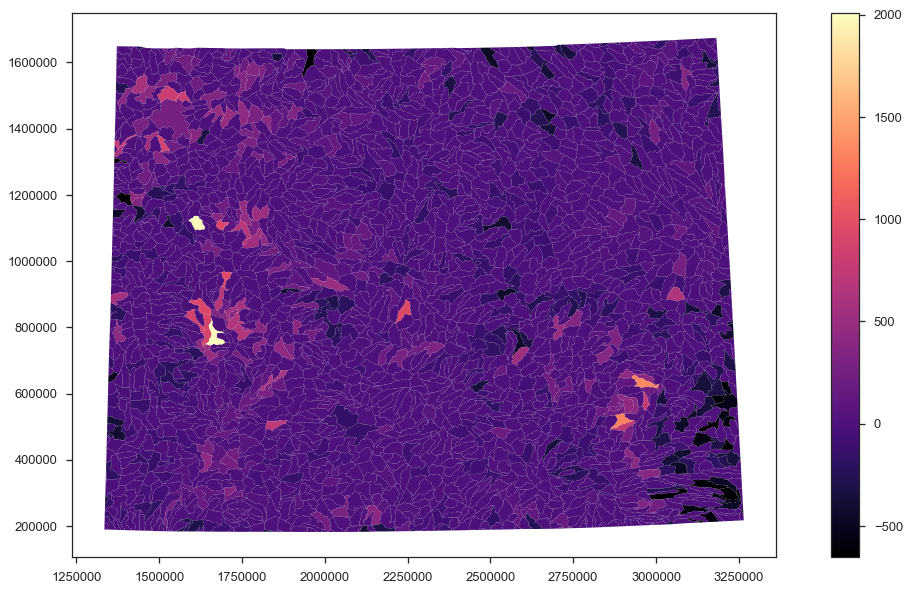

In [4]:
path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\hotspot analysis\\sed hotspot joined with hucs\\REE\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed, sort=False)
'''
frame = frame.drop(columns=['Join_Count', 'TARGET_FID', 'AREA', 'PERIMETER', 'WY_HU12_',
       'WY_HU12_ID', 'HUC_8', 'HUC_10', 'ACRES', 'STATES',
       'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE',
       'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD', 'HU_12_TYPE', 'HU_2_NAME',
       'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME', 'Shape_Leng', 'SOURCE_ID',
       'GiPValue', 'NNeighbors', 'Gi_Bin',
       'Shape_Length', 'Shape_Area'])
'''
summary = frame.groupby('HUC_12', as_index=False).sum()
middle=huc12.merge(summary.astype(object), on='HUC_12', how='right')
sed_comb = huc12.merge(middle[['HUC_12', 'z_score']].astype(str), on='HUC_12', how='left')
crs={'init': 'epsg:3732'}
sed_comb= sed_comb.to_crs(crs)
sed_comb.plot(column=pd.to_numeric(sed_comb['z_score']), cmap='magma', legend=True, figsize=(20,10))
counties=gpd.read_file(r'J:\Geology\WSGS\GIS\County_boundaries_polys.shp')
counties= counties.to_crs(crs)


In [5]:
imputed_merged = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\imputed_rock_values.csv')
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
#writes the point data to a shapefile in the dir called data.shp
geometry = [Point(xy) for xy in zip(imputed_merged.longitude, imputed_merged.latitude)]
crs = {'init': 'epsg:3732'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(imputed_merged, crs={'init': 'epsg:4326'}, geometry=geometry)
projGeoDF=geo_df.to_crs(crs)
points_with_basin=gpd.sjoin(huc12, projGeoDF, how='inner', op='intersects')
rock_basins = points_with_basin.HUC_12.unique()

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,9,10,13,14,15,21,27,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


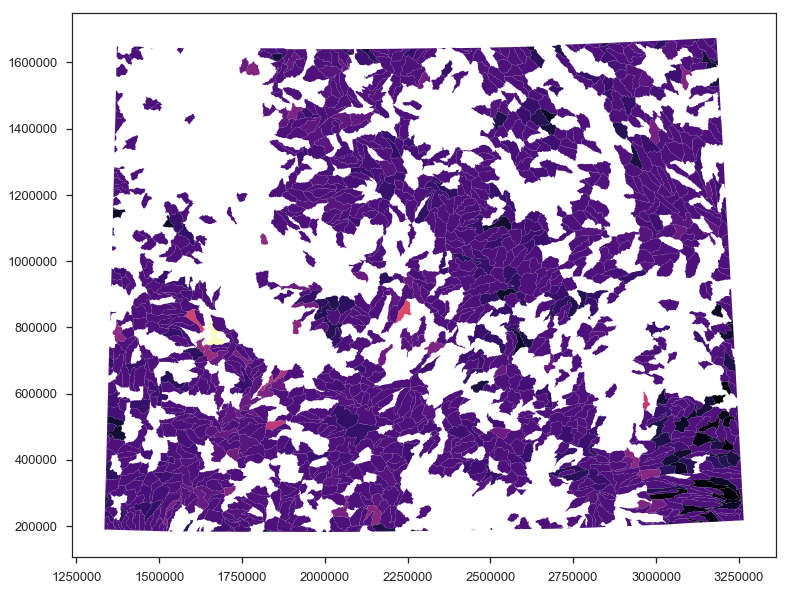

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
rocks = combined[combined['HUC_12'].isin(rock_basins)]
rock_free = sed_comb[sed_comb['HUC_12'].isin(rock_basins)==False]
rock_free['zscore'] = rock_free.z_score.astype(float).values
#rocks.plot(ax=ax,alpha=1, column='GiZScore', cmap='viridis')
rock_free.plot(ax=ax, alpha=1, column='zscore', cmap='magma')
rocks['zscore'] = rocks.GiZScore.astype(float).values
#plt.savefig(r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\Report\\ree_rock')
#rocks.to_file(driver='ESRI Shapefile', filename='au_rock.shp')
rock_free.to_file(driver='ESRI Shapefile', filename='ree_sed.shp')

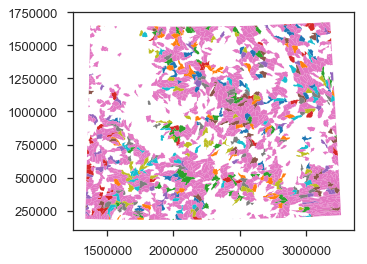

In [47]:
rock_free.plot(column='z_score')

In [157]:
matching = combined[combined['HUC_12'].isin(rock_basins)][['HUC_12','GiZScore']].merge(sed_comb[sed_comb['HUC_12'].isin(rock_basins)][['HUC_12','z_score']])

(-500, 500)

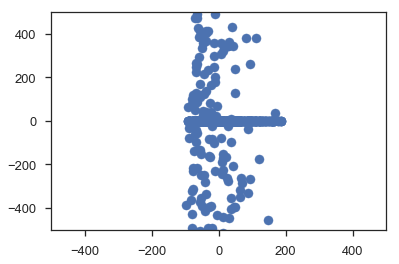

In [164]:
plt.scatter(matching['GiZScore'].values.astype(float), matching['z_score'].values.astype(float))
plt.xlim(-500,500)
plt.ylim(-500,500)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-6, 6)

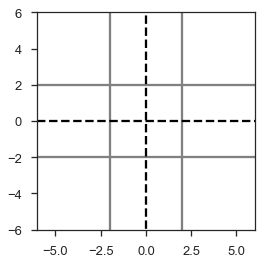

In [201]:
plt.plot(np.arange(-6,7),np.zeros(13)+2, c='gray')
plt.plot(np.arange(-6,7), np.zeros(13)-2, c='gray')
plt.plot(np.zeros(20)-2, np.arange(-10,10), c='gray')
plt.plot(np.zeros(20)+2, np.arange(-10,10), c='gray')
plt.plot(np.zeros(20), np.arange(-10,10), '--', c='k')
plt.plot(np.arange(-6,7), np.zeros(13), '--', c='k')

plt.axes().set_aspect('equal')
plt.xlim(-6,6)
plt.ylim(-6,6)

In [179]:
np.zeros(10)+2

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])